In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import umap

import sys
sys.path.append("../profiling/")
import profiling

In [2]:
NUM_FEATURES = 672
INPUT_PROFILES = "data/CellPainting_combinedset_exp.csv"

In [3]:
wells = pd.read_csv(INPUT_PROFILES)
columns2 = [str(i) for i in range(NUM_FEATURES)]

In [4]:
treatment_level = wells.groupby(["pert_name","broad_sample"]).mean().reset_index()

In [5]:
matches_official_file = "/raid/data/cellpainting/TAORF/inputs/metadata/TAORF_MOA_MATCHES_official.csv"
moas = pd.read_csv(matches_official_file)

In [6]:
annotated_treatments = pd.merge(treatment_level, moas, on=["broad_sample", "pert_name"])

# Well-level UMAP

In [7]:
reducer = umap.UMAP(n_neighbors=15, n_components=2)
embeddings = reducer.fit_transform(wells[columns2])
aux = pd.concat((pd.DataFrame(embeddings, columns=["X", "Y"]), wells.reset_index()), axis=1)

In [8]:
aux["Control"] = ""
aux.loc[aux["pert_name"] == "EMPTY_", "Control"] = "Control"
aux.loc[aux["pert_name"] != "EMPTY_", "Control"] = "Replicate"

In [9]:
trt_embb = reducer.transform(annotated_treatments[columns2])
main = pd.concat((pd.DataFrame(trt_embb, columns=["X","Y"]), annotated_treatments), axis=1)

[(4, 16)]

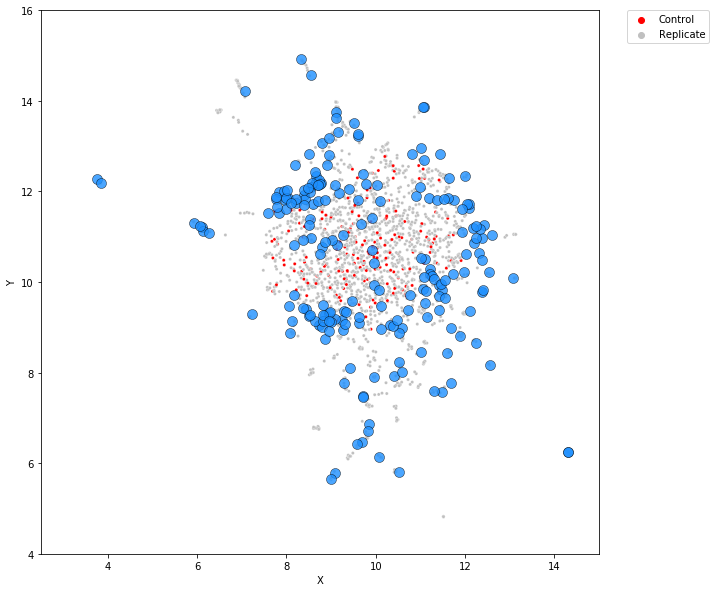

In [25]:
plt.figure(figsize=(10,10))
g = sb.scatterplot(data=aux, x="X", y="Y", hue="Control", s=10, palette=["red", "silver"])
h = sb.scatterplot(data=main, x="X", y="Y", s=100, color="dodgerblue", linewidth=0.5, edgecolor="black", alpha=0.8)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
x_lims = (2.5, 15)
y_lims = (4, 16)
g.set(xlim=x_lims)
g.set(ylim=y_lims)

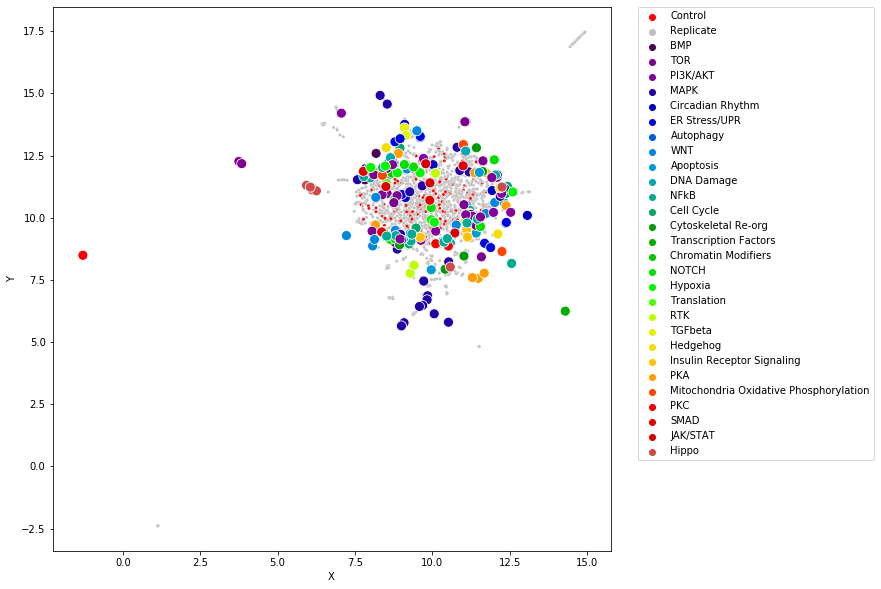

In [12]:
plt.figure(figsize=(10,10))
g = sb.scatterplot(data=aux, x="X", y="Y", hue="Control", s=10, palette=["red", "silver"])
h = sb.scatterplot(data=main, x="X", y="Y", s=100, hue="Metadata_moa", palette="nipy_spectral")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

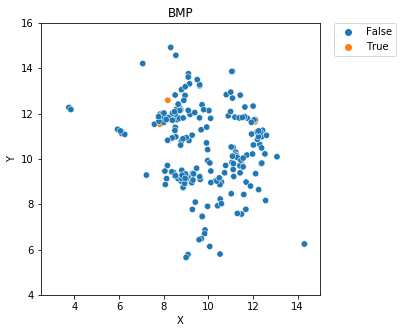

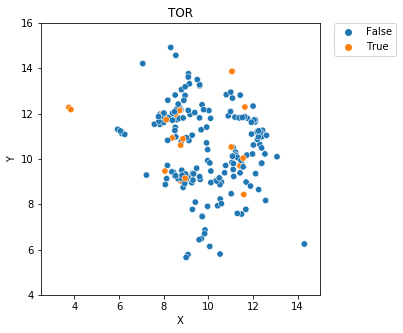

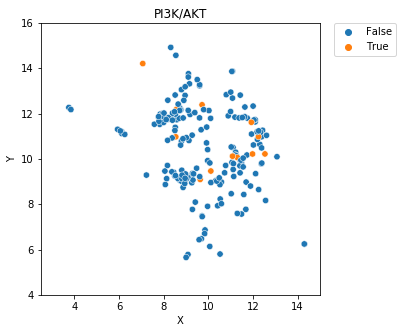

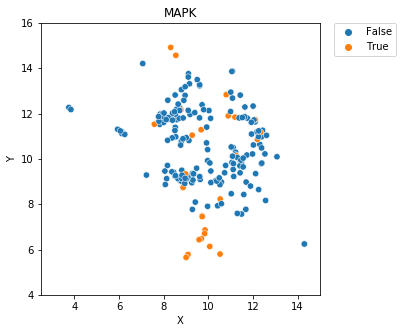

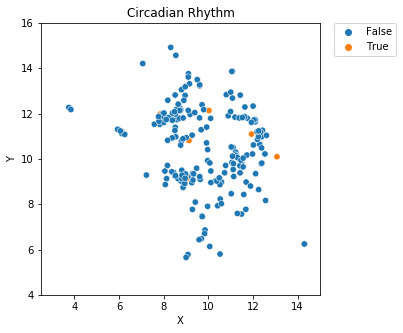

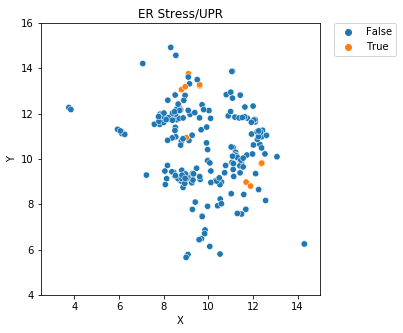

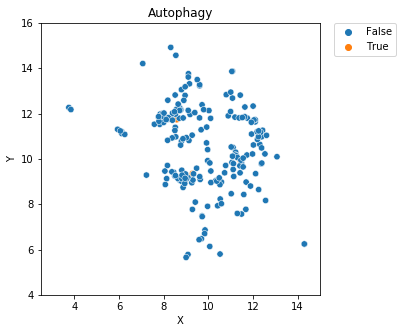

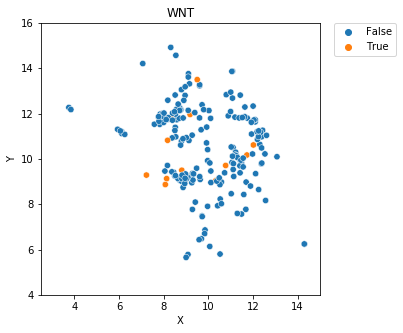

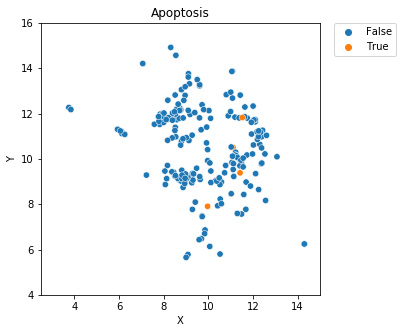

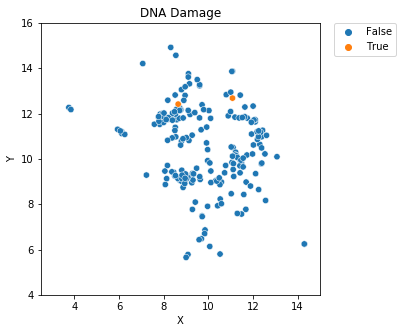

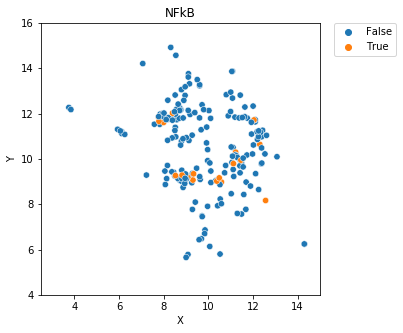

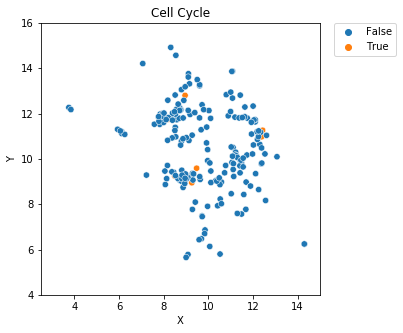

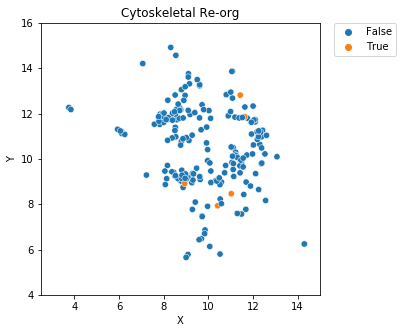

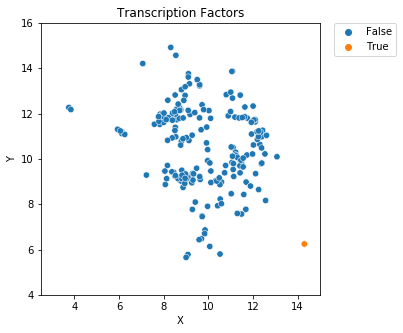

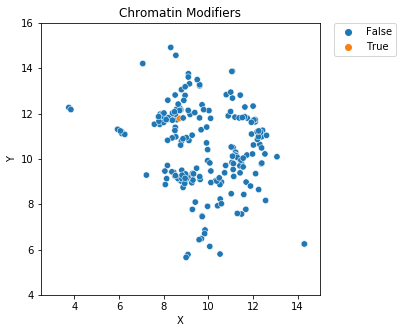

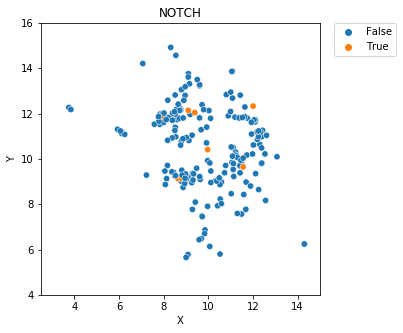

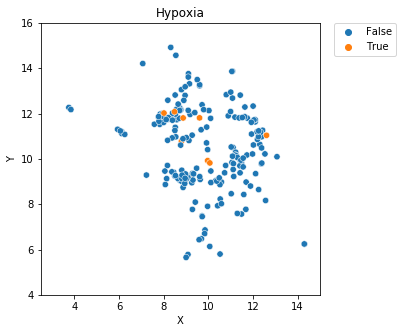

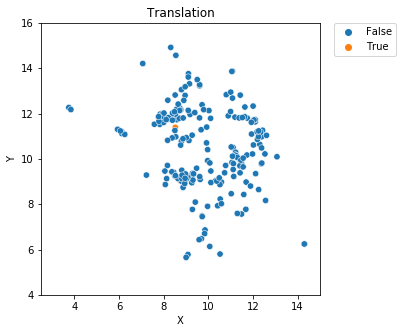

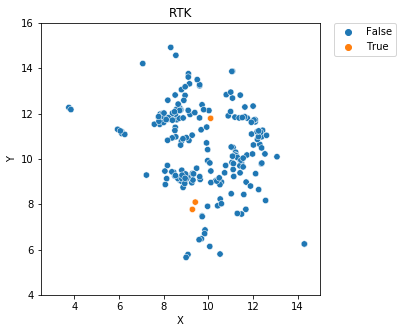

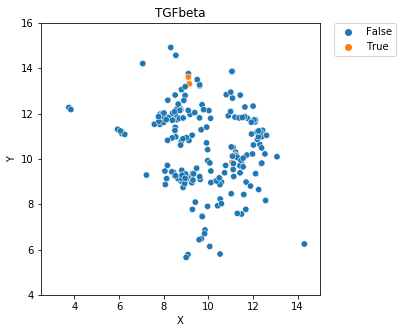

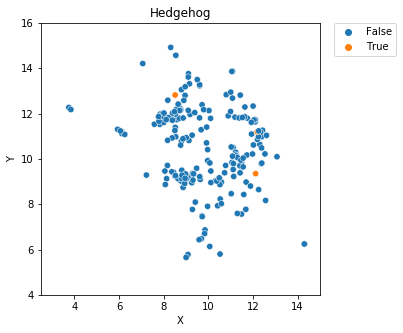

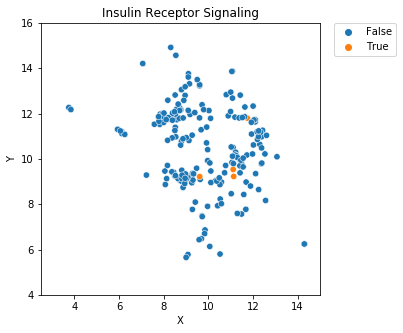

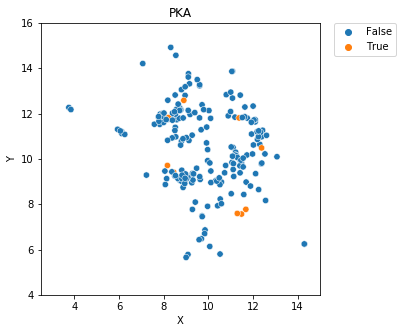

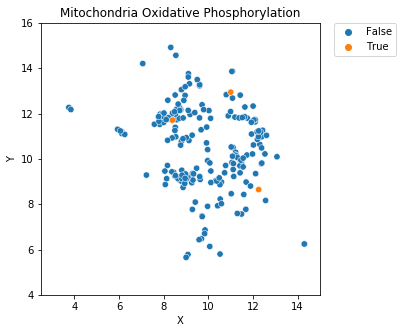

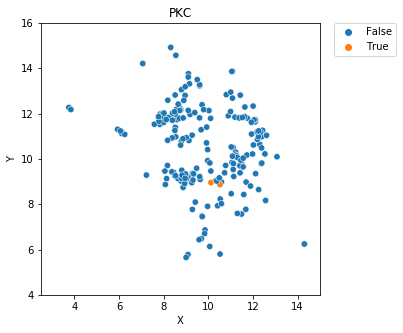

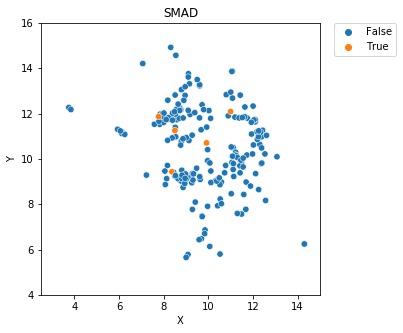

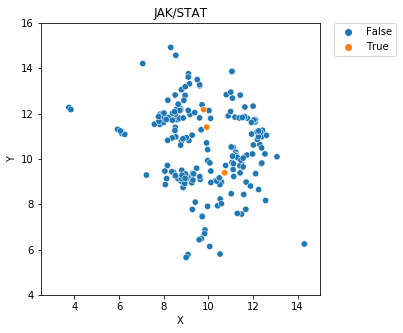

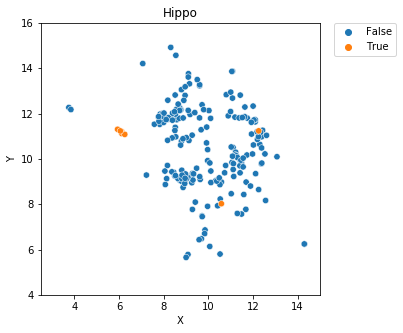

In [26]:
main["Display"] = False
for moa in main.Metadata_moa.unique():
    main.Display = main.Metadata_moa == moa
    plt.figure(figsize=(5,5))
    g = sb.scatterplot(data=main, x="X", y="Y", s=40, hue="Display")
    g.set(title=moa)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    g.set(xlim=x_lims)
    g.set(ylim=y_lims)
    plt.show()

# Treatment-level correlations

In [14]:
X, Y = profiling.load_correlation_matrix("data/mixed_validation_matrix.csv")

/home/jupyter-jcaicedo@broadinst-d9764/.local/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


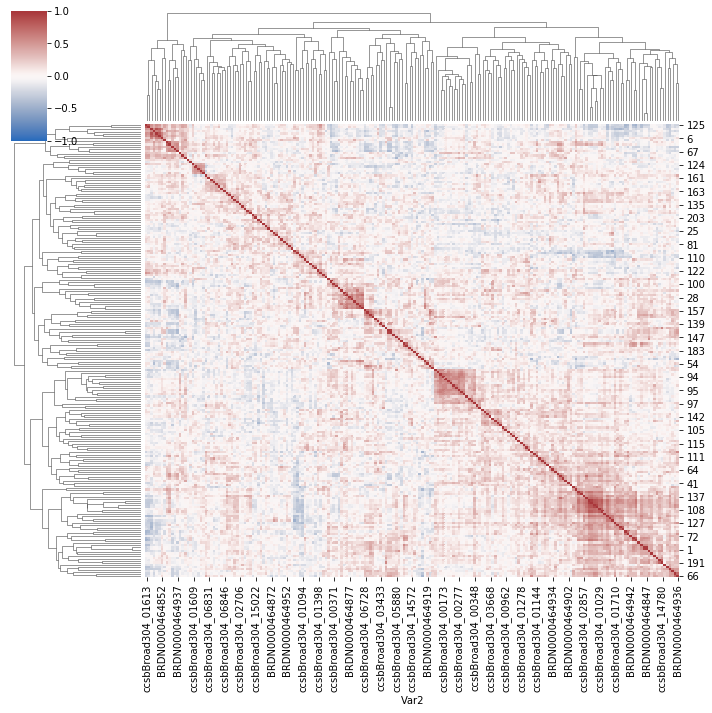

In [15]:
sb.clustermap(X[Y.Var1], cmap="vlag", vmin=-1, vmax=1)